# Aprendizado Não Supervisionado

### Dataset Iris

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Separando X e Y

In [2]:
X,y = load_iris(return_X_y=True,as_frame=True)

In [3]:
# Visualizando X
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


### Selecionando apenas as colunas de pétala

In [4]:
X1 = X.loc[:,['petal length (cm)','petal width (cm)']]

### Visualizando graficamente os pontos
    

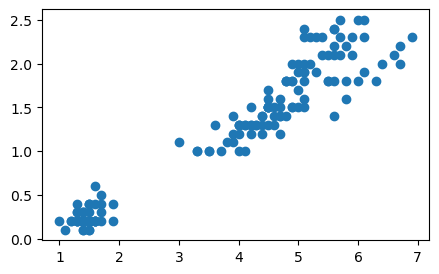

In [5]:
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'])

plt.show()

# Utilizando algoritmo K-means


In [6]:
from sklearn.cluster import KMeans

### Instanciando e fazendo fit

In [7]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X1)

C:\Users\leand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Verificando quais foram os labels determinados pelo k-means

In [8]:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualizando graficamente os grupos

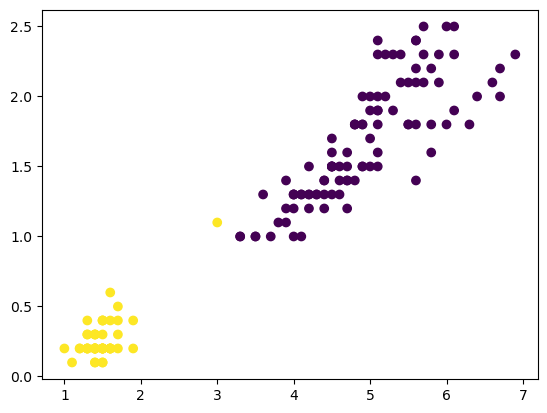

In [9]:
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans2.labels_)

plt.show()

## Esse ponto distante dos pontos em roxo, deveria realmente estar como roxo?

Ele está mais proximo do centroide do roxo, do que o amarelo. 

In [10]:
# Visualizando o ponto
ponto = X1[X1['petal length (cm)'] == 3]
ponto

,petal length (cm),petal width (cm)
98,3.0,1.1


### Vamos visualizar o ponto, juntamente com os centroides

Centroids obtidos atraves da função kmeans2.cluster_centers

In [11]:
# Verificando os centróides
kmeans2.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

### Visualizando graficamente 

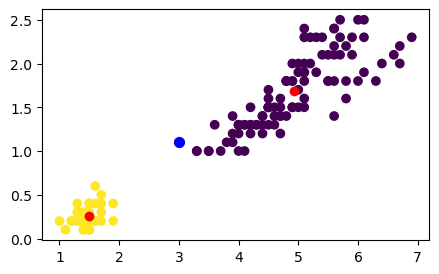

In [12]:
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans2.labels_)
ax.scatter(ponto['petal length (cm)'],ponto['petal width (cm)'],c='b',s=50)
ax.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='r')

plt.show()



### Tambem poderiamos calcular matematicamente as distancias entre os pontos:

In [13]:
# Considerando o x e o y do ponto
x_ponto = ponto['petal length (cm)']
y_ponto = ponto['petal width (cm)']

In [14]:
# O x e y para o ponto em roxo
x_roxo = kmeans2.cluster_centers_[0][0]
y_roxo = kmeans2.cluster_centers_[0][1]

In [15]:
# E para o ponto amarelo
x_amarelo = kmeans2.cluster_centers_[1][0]
y_amarelo = kmeans2.cluster_centers_[1][1]

In [16]:
# Podemos calcular a distância ao ponto roxo
((x_roxo-x_ponto)**2+(y_roxo-y_ponto)**2)**(1/2)

98    2.011246
dtype: float64

In [17]:
# E a distância ao ponto amarelo
((x_amarelo-x_ponto)**2+(y_amarelo-y_ponto)**2)**(1/2)

98    1.724699
dtype: float64

### Concluimos que o ponto está mais proximo do centroide do roxo, do que o amarelo.

# Mas qual o valor de k ideal?

Podemos utilizar inertia_ para calcular a qualidade do ajuste do modelo aos dados

Quanto menor a inércia, melhor separação entre os grupos de dados. Evitando o superajuste dos dados e inumeros grupos

### Podemos analisar o melhor k com um laço, alterando os valores de K:

In [36]:
# Retirando temporariamente os warnings do nosso código
import warnings
warnings.filterwarnings('ignore')

In [37]:
valores_k = []
inercias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X1)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

## Visualizando graficamente cada valor de k e a inercia

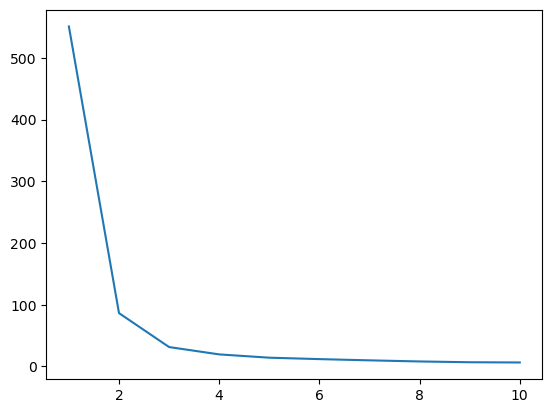

In [38]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

### De acordo com metodo Elbow Method (metodo do cotovelo):

O metodo identifica o ponto onde a curva forma um "cotovelo", indicando um equilíbrio entre a redução da inércia e a adição de clusters. Este ponto é frequentemente considerado o número ideal de clusters.

Porem, isso é apenas um direcionamento, porém o que é mais importante é conhecermos o negócio!




